In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (8,6)      # 设置绘图图像大小

```
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
指定dpi=200，图片尺寸为 1200*800
指定dpi=300，图片尺寸为 1800*1200
设置figsize可以在不改变分辨率情况下改变比例

sns.set(style="white", color_codes=True)
```

# 1. EDA

In [3]:
iris_data = load_iris().data
iris_label = load_iris().target
feature_names = [i.split()[0]+i.split()[1] for i in load_iris().feature_names]

In [4]:
[i.split()[0]+i.split()[1] for i in load_iris().feature_names]

['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

In [5]:
data_df = pd.DataFrame(iris_data,columns=feature_names)
data_df['label'] = iris_label

In [6]:
data_df.head()

,sepallength,sepalwidth,petallength,petalwidth,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# print(load_iris().DESCR)
# - Iris-Setosa
# - Iris-Versicolour
# - Iris-Virginica

In [8]:
# for i in feature_names:
#     sns.boxplot(x='label', y=i, data=data_df)
#     plt.title(i)
#     plt.show()

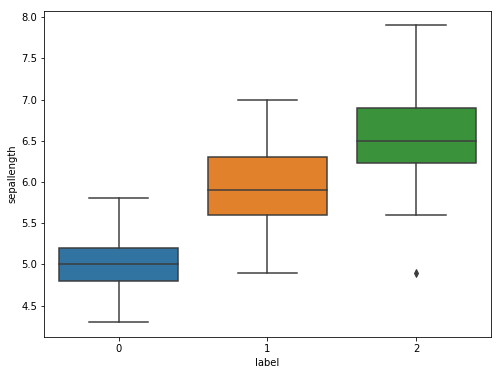

In [9]:
sns.boxplot(x='label', y='sepallength', data=data_df)

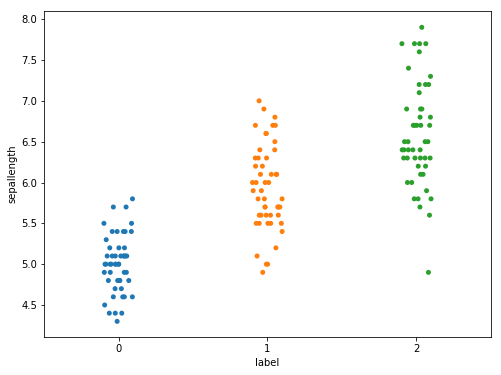

In [10]:
sns.stripplot(x='label', y='sepallength', data=data_df)

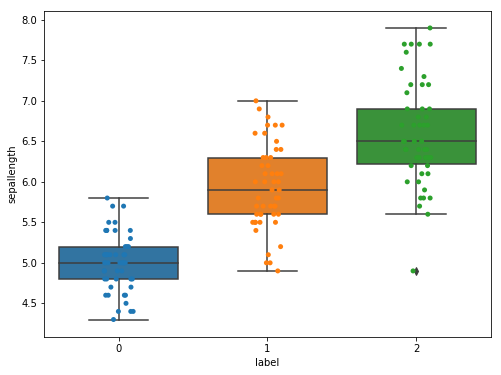

In [11]:
sns.boxplot(x='label', y='sepallength', data=data_df)
sns.stripplot(x='label', y='sepallength', data=data_df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


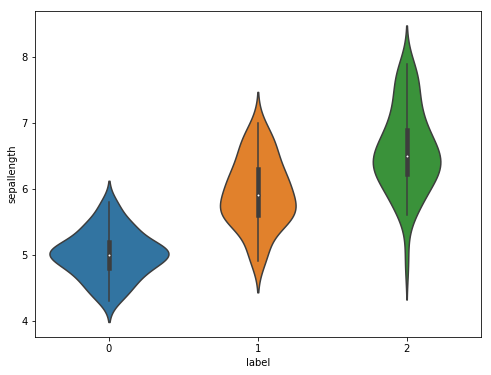

In [12]:
sns.violinplot(x='label', y='sepallength', data=data_df)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


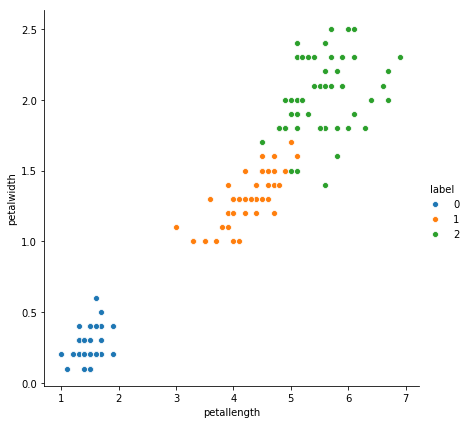

In [13]:
sns.FacetGrid(data_df, hue='label', size=6).map(sns.scatterplot, "petallength", "petalwidth").add_legend()

用 seaborn 的 FacetGrid 函数按照Species花的种类来在散点图上标上不同的颜色，hue英文是色彩的意思。

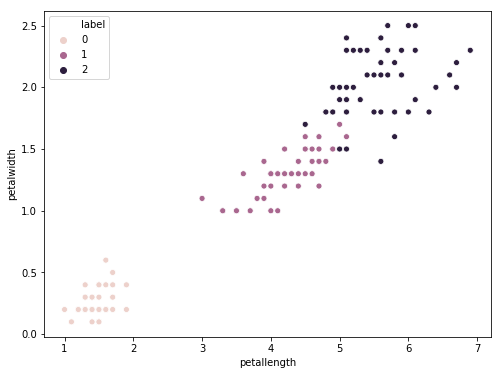

In [14]:
sns.scatterplot(x='petallength', y='petalwidth', hue='label', data=data_df)
# No cmap attribute?????

if use plt.scatter() can not show label as above, could give each cate different color, BUT sns.scatterplot() is better than sns.FacetGrid()

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


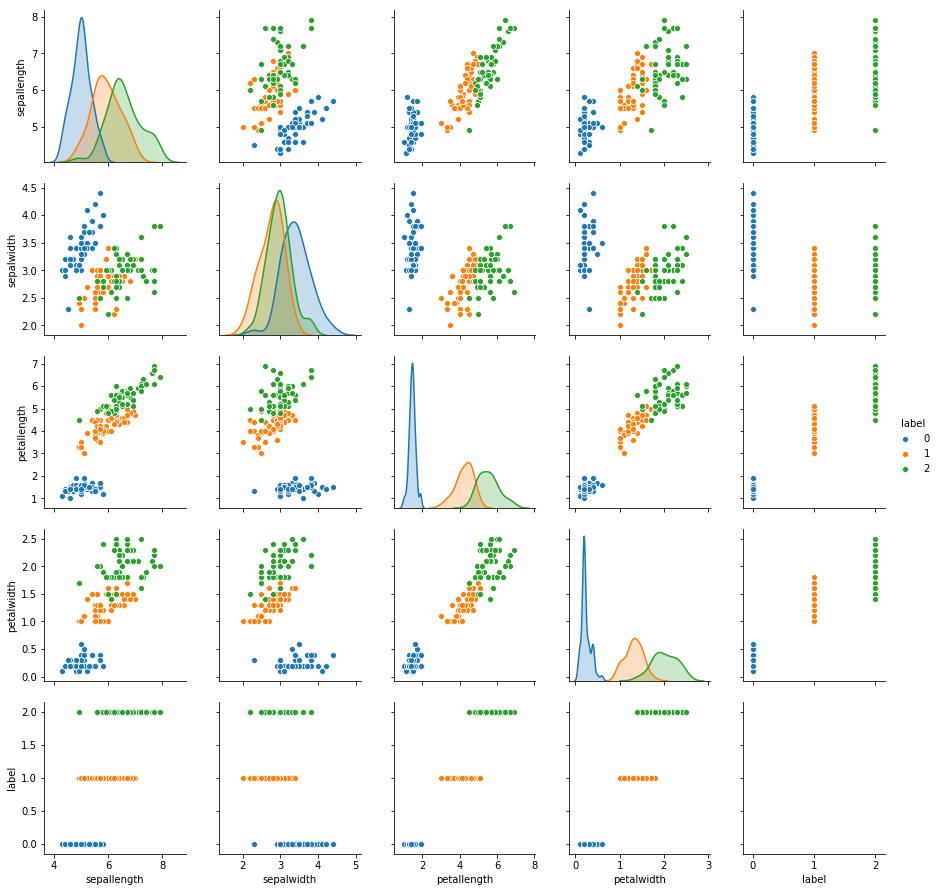

In [15]:
sns.pairplot(data_df, hue='label') # diag_kind='kde'

In [16]:
# pd.scatter_matrix(data_df)

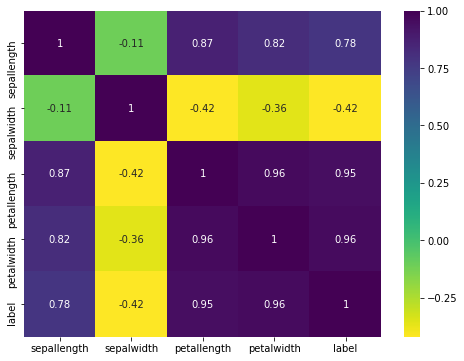

In [17]:
corr = data_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.viridis_r)

It seems that find the useful feature is better to use corr than ot use pairplot. numeric figure is better than image

# 2. Kmeans

In [18]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [19]:
X = data_df[feature_names]
y = data_df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=42)

In [21]:
km = KMeans(n_clusters=3)
km.fit(X_train[['petallength', 'petalwidth']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
predict = km.predict(X_test[['petallength', 'petalwidth']])
predict

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 2, 1], dtype=int32)

In [25]:
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

> TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

> AttributeError: 'DataFrame' object has no attribute 'reshape'


- X_test - pandas.core.frame.DataFrame
- predict - numpy.ndarray


1. concat by np.array
2. transfer np.array to pd.Dataframe

In [26]:
pred_arr = np.concatenate([X_test[['petallength', 'petalwidth']].values, predict.reshape(-1,1)],axis=1)
pred_df = pd.DataFrame(pred_arr, columns=['petallength', 'petalwidth','label'])

KMeans has seperated and labeled samples to 3 clusters. BUT the labels are different from the origin label.
```
def exchange_predict_label(x):
    # 用于交换label的函数，需要自己观察label调整方式
    if x==0:
        return 2
    elif x==1:
        return 0
    else:
        return 1
        
predict = np.array([i for i in map(exchange_predict_label, predict)])
```   
using Lambda expression is better than the function above.

```pred_df['label'] = pred_df['label'].apply(lambda x:2 if x==0 else 0 if x==1 else 1)```

In [27]:
# pred_df['label'] = pred_df['label'].apply(lambda x:2 if x==0 else 0 if x==1 else 1)
pred_df['label'] = pred_df['label'].apply(lambda x:2 if x==1 else 1 if x==2 else x).astype(int)
pred_df.head()

,petallength,petalwidth,label
0,4.7,1.2,1
1,1.7,0.3,0
2,6.9,2.3,2
3,4.5,1.5,1
4,4.8,1.4,1


In [28]:
test_df = pd.concat([X_test[['petallength', 'petalwidth']],y_test], axis=1)
test_df.head()

,petallength,petalwidth,label
73,4.7,1.2,1
18,1.7,0.3,0
118,6.9,2.3,2
78,4.5,1.5,1
76,4.8,1.4,1


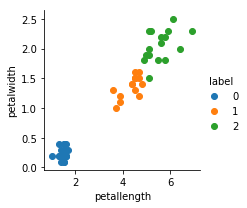

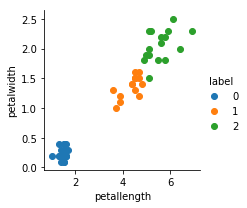

In [29]:
sns.FacetGrid(test_df, hue='label').map(plt.scatter, 'petallength','petalwidth').add_legend()
sns.FacetGrid(pred_df, hue='label').map(plt.scatter, 'petallength','petalwidth').add_legend()

Text(0.5,1,'pred_df')

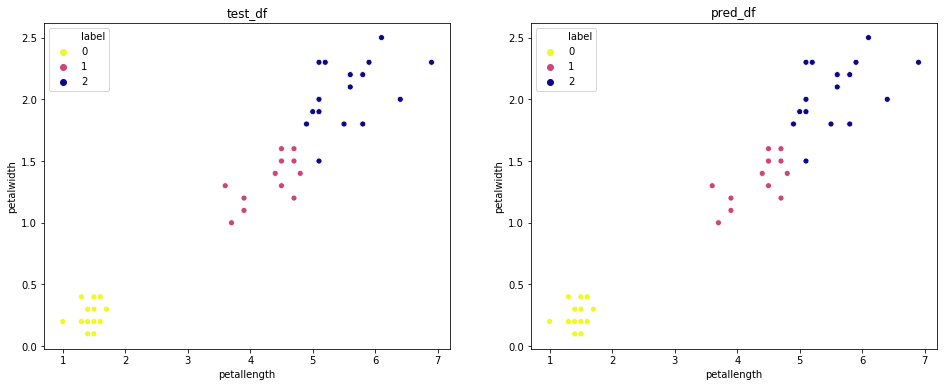

In [30]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.scatterplot('petallength','petalwidth', hue='label', data=test_df, palette=plt.cm.plasma_r)
ax1.set_title('test_df')
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.scatterplot('petallength','petalwidth', hue='label', data=pred_df, palette=plt.cm.plasma_r)
ax2.set_title('pred_df')

In [33]:
np.mean(pred_df.label.values == y_test)

1.0